In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 콘서트시설

* 해당 `.xls` 파일은 `xlrd` 라이브러리를 내려받아야 조회할 수 있습니다.

`pip install xlrd`

In [113]:
df = pd.read_excel('program_facility.xls')
df.columns = df.iloc[2]
df = df.drop([0, 1, 2, 3], axis = 0).set_index('No.')
df.rename(columns={'지역':'시(도)', np.nan: '구(군)'}, inplace=True)
df['총객석수'] = np.array(df['총객석수'], dtype = 'int64')
df.head()

2,시설명,공연장수,총객석수,공연장명,객석수,시설특성,개관연도,시(도),구(군),주소
No.,,,,,,,,,,
1,힐론카페 힐론다이닝,2,0,힐론카페\n힐론다이닝 (4F),0\n0,기타(비공연장),0000,전남,여수시,전라남도 여수시 안산1길 62 (안산동)
2,힉셀스튜디오,1,50,힉셀스튜디오,50,민간(대학로 외),0000,서울,서초구,서울특별시 서초구 효령로 165 (서초동)
3,히브루스홀,1,0,히브루스홀,0,민간(대학로 외),0000,서울,마포구,서울특별시 마포구 서강로 144(노고산동)
4,히브루스,1,150,히브루스,150,기타(비공연장),0000,서울,마포구,서울특별시 마포구 서강로 144 (노고산동)
5,히든 사운드,1,0,히든 사운드,0,민간(대학로 외),0000,경기,화성시,경기도 화성시 지산1길 22-4 (영천동)


In [ ]:
df.info()   # Null 일단 냅두기

<class 'pandas.core.frame.DataFrame'>
Index: 3334 entries, 1 to 3334
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시설명     3334 non-null   object
 1   공연장수    3334 non-null   object
 2   총객석수    3334 non-null   int64 
 3   공연장명    3333 non-null   object
 4   객석수     3334 non-null   object
 5   시설특성    3334 non-null   object
 6   개관연도    3334 non-null   object
 7   시(도)    3334 non-null   object
 8   구(군)    3322 non-null   object
 9   주소      3334 non-null   object
dtypes: int64(1), object(9)
memory usage: 415.6+ KB


In [14]:
df['총객석수'].describe()

# mean = 1000
# std = 6700
# 전처리 필요해 보임. 
# 어쨌든 총 객석수가 (mean + 1std)명 이상인 애들 plot해보자.

count      3334.000000
mean       1035.646071
std        6744.337872
min           0.000000
25%           0.000000
50%         100.000000
75%         376.000000
max      206255.000000
Name: 총객석수, dtype: float64

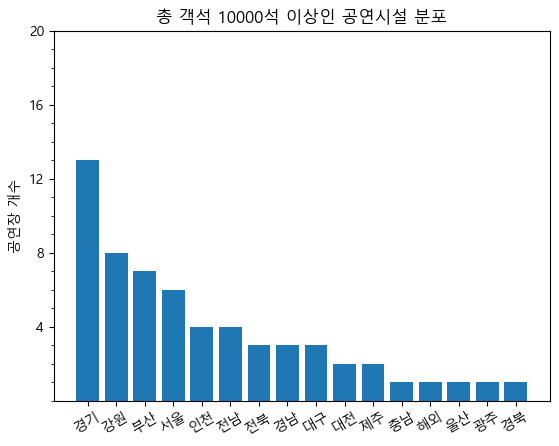

In [15]:
size = 10000

plt.rcParams['font.family'] = 'malgun gothic'
plt.rcParams['axes.unicode_minus'] = False

city_counts = df[df['총객석수'] > size]['시(도)'].value_counts()

plt.bar(city_counts.index, city_counts.values)
plt.xticks(rotation = 30)
plt.yticks(range(4, 21, 4))
plt.yticks(range(21), minor = True)
plt.ylabel('공연장 개수')
plt.title(f'총 객석 {size}석 이상인 공연시설 분포')
plt.show()

In [16]:
sum(df['총객석수'] >= 7000)

73

# 원준DB(두산 베어스 아님)

## 일단 다 변수에 담기

In [17]:
from glob import glob

ki_june_csv = glob("../Wonjun_datasets/*.csv")
ki_june_csv

['../Wonjun_datasets\\한국교통안전공단_전국 대중교통 버스정류장 현황_20221231 오후 5.49.25.csv',
 '../Wonjun_datasets\\한국교통안전공단_전국 지역별 대중교통 서비스별 만족도 현황_20231231.csv',
 '../Wonjun_datasets\\한국교통안전공단_전국 지역별 대중교통 이용 및 환승실태_20231231.csv',
 '../Wonjun_datasets\\한국철도공사_역별 타 교통수단과 환승현황_20231231.csv']

## 한국교통안전공단_전국 대중교통 버스정류장 현황

In [ ]:
bus_stop = pd.read_csv(ki_june_csv[0])

In [19]:
bus_stop.set_index('구분', inplace = True)
print(bus_stop.info(), bus_stop.shape)
bus_stop

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 서울 to 제주
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   전체버스정류장  17 non-null     int64
 1   유개버스정류장  17 non-null     int64
dtypes: int64(2)
memory usage: 408.0+ bytes
None (17, 2)


,전체버스정류장,유개버스정류장
구분,,
서울,11109,4422
부산,3689,2981
대구,3335,2151
인천,6234,4234
광주,2369,1521
대전,2361,1822
울산,3460,1768
세종,1143,655
경기,35469,19687


Text(0.5, 1.0, '한국교통안전공단_전국 대중교통 버스정류장 현황')

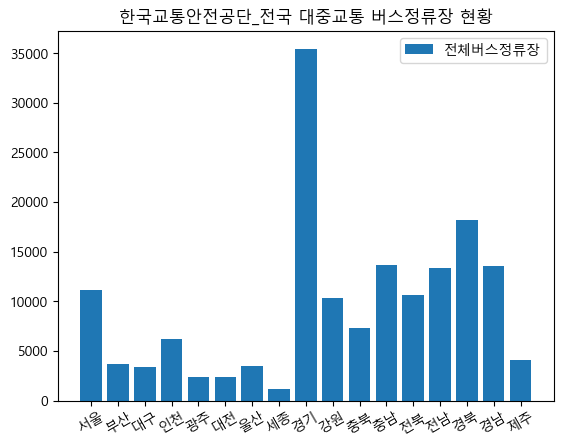

In [ ]:
# plt.figure(figsize = (10, 10))

plt.bar(bus_stop.index, bus_stop['전체버스정류장'], label = '전체버스정류장')
# plt.bar(bus_stop.index, bus_stop['유개버스정류장'], label = '유개버스정류장')
plt.xticks(rotation = 30)
plt.legend()
plt.title("한국교통안전공단_전국 대중교통 버스정류장 현황")

# 사실 저 유개버스정류장이 의미가 있으려나 모르겠음. 지붕있는 버정이라는데.
# 일단 경기도가 압도적으로 많음
# 그렇다고 아랫지방이 버정 수가 적냐? 그런 것도 아님. 서울보다 많거든
# 그래도 지역 면적 생각하면.. 더 많으면 좋겠다 싶어요.

## API로 대중공연 목록이랑 공연장 목록 불러오기?

In [64]:
from kopis_key import kopis_key

import pandas as pd
import requests
from bs4 import BeautifulSoup
import lxml
import time

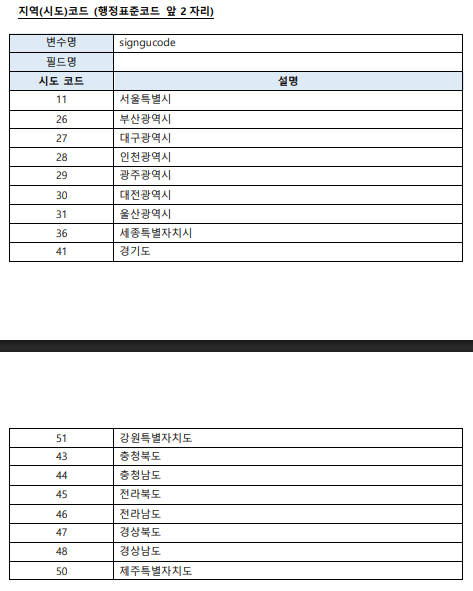

In [109]:
sigungu = ['11', '28', '30', '27', '29', '26', '31', '36', '41', '43', '44', '47', '48', '45', '46', '51', '50', 'UNI']
rows = []

for location_code in sigungu:
    i = 1
    while True:
        url = f"http://www.kopis.or.kr/openApi/restful/pblprfr?service={kopis_key}&stdate=20230101&eddate=20250430&cpage={i}&rows=100&signgucode={location_code}&shcate=CCCD"
        res = requests.get(url)
        soup = BeautifulSoup(res.text, 'lxml')
        db_list = soup.find_all('db')
        if len(db_list) == 0:
            print(f"There is no any data")
            break
    
        for db in db_list:
            row = {}
            for concert in db.find_all(recursive = False):
                row[concert.name] = concert.text
            rows.append(row)
    
        print(f"Location {location_code}: page {i} completed")
        i += 1
        time.sleep(1)
    

df = pd.DataFrame(rows)
df

C:\Users\98_ja\AppData\Local\Temp\ipykernel_14192\1455593853.py:9: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup(res.text, 'lxml')


Location 11: page 1 completed
Location 11: page 2 completed
Location 11: page 3 completed
Location 11: page 4 completed
Location 11: page 5 completed
Location 11: page 6 completed
Location 11: page 7 completed
Location 11: page 8 completed
Location 11: page 9 completed
Location 11: page 10 completed
Location 11: page 11 completed
Location 11: page 12 completed
Location 11: page 13 completed
Location 11: page 14 completed
Location 11: page 15 completed
Location 11: page 16 completed
Location 11: page 17 completed
Location 11: page 18 completed
Location 11: page 19 completed
Location 11: page 20 completed
Location 11: page 21 completed
Location 11: page 22 completed
Location 11: page 23 completed
Location 11: page 24 completed
Location 11: page 25 completed
Location 11: page 26 completed
Location 11: page 27 completed
Location 11: page 28 completed
Location 11: page 29 completed
Location 11: page 30 completed
Location 11: page 31 completed
Location 11: page 32 completed
Location 11: page

,mt20id,prfnm,prfpdfrom,prfpdto,fcltynm,poster,area,genrenm,openrun,prfstate
0,PF263492,RAP HOUSE VOL.40,2025.04.25,2025.04.25,"플렉스라운지 (구. 스테이라운지, 구. 인디팍)",http://www.kopis.or.kr/upload/pfmPoster/PF_PF2...,,대중음악,N,공연완료
1,PF263462,"막주금라이브 Vol.40, 윤숭",2025.04.25,2025.04.25,Cafe PPnF,http://www.kopis.or.kr/upload/pfmPoster/PF_PF2...,,대중음악,N,공연완료
2,PF263366,퍼트 단독 콘서트: CREDIT,2025.04.26,2025.04.26,플렉스홀 3호점,http://www.kopis.or.kr/upload/pfmPoster/PF_PF2...,,대중음악,N,공연완료
3,PF263297,KOR KASH: DO OR DIE CONCERT,2025.04.27,2025.04.27,웨스트브릿지 라이브홀,http://www.kopis.or.kr/upload/pfmPoster/PF_PF2...,,대중음악,N,공연완료
4,PF263263,수상한스테이지 (04.25),2025.04.25,2025.04.25,수상한창고,http://www.kopis.or.kr/upload/pfmPoster/PF_PF2...,,대중음악,N,공연완료
...,...,...,...,...,...,...,...,...,...,...
8736,PF217954,하모나이즈 콘서트,2023.05.30,2023.05.30,제주아트센터,http://www.kopis.or.kr/upload/pfmPoster/PF_PF2...,,대중음악,N,공연완료
8737,PF215207,고학찬의 비긴어게인 [제주],2023.04.16,2023.04.16,제주특별자치도 설문대여성문화센터,http://www.kopis.or.kr/upload/pfmPoster/PF_PF2...,,대중음악,N,공연완료
8738,PF215031,맘마미아 아바걸스 [제주],2023.04.22,2023.04.23,제주관광대학교컨벤션홀,http://www.kopis.or.kr/upload/pfmPoster/PF_PF2...,,대중음악,N,공연완료
8739,PF205284,강진 콘서트 [제주],2023.02.04,2023.02.04,서귀포예술의전당,http://www.kopis.or.kr/upload/pfmPoster/PF_PF2...,,대중음악,N,공연완료


In [110]:
df.to_csv("concert_list.csv", index=False)

In [ ]:
concert_list = pd.read_csv('concert_list.csv')
concert_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8741 entries, 0 to 8740
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mt20id     8741 non-null   object 
 1   prfnm      8741 non-null   object 
 2   prfpdfrom  8741 non-null   object 
 3   prfpdto    8741 non-null   object 
 4   fcltynm    8741 non-null   object 
 5   poster     8741 non-null   object 
 6   area       0 non-null      float64
 7   genrenm    8741 non-null   object 
 8   openrun    8741 non-null   object 
 9   prfstate   8741 non-null   object 
dtypes: float64(1), object(9)
memory usage: 683.0+ KB


2,시설명,공연장수,총객석수,공연장명,객석수,시설특성,개관연도,시(도),구(군),주소
No.,,,,,,,,,,
232,"플렉스라운지 (구. 스테이라운지, 구. 인디팍)",1,150,"플렉스라운지 (구. 스테이라운지, 구. 인디팍)",150,민간(대학로 외),2015,서울,마포구,서울특별시 마포구 양화로 100-10 (서교동)


In [ ]:
concert_list = concert_list[concert_list['fcltynm'].isin(df['시설명'].unique())].reset_index(drop = True)
concert_list = concert_list.iloc[:, [0, 1, 2, 3, 4]]
concert_list.rename(columns = {'fcltynm':'시설명'}, inplace = True)
concert_list

df_merged = concert_list.merge(
    df[['시설명', '총객석수', '시(도)', '구(군)','주소']],
    on='시설명',
    how='inner'
)
df.merged

,mt20id,prfnm,prfpdfrom,prfpdto,시설명,총객석수,시(도),구(군),주소
0,PF263492,RAP HOUSE VOL.40,2025.04.25,2025.04.25,"플렉스라운지 (구. 스테이라운지, 구. 인디팍)",150,서울,마포구,서울특별시 마포구 양화로 100-10 (서교동)
1,PF263462,"막주금라이브 Vol.40, 윤숭",2025.04.25,2025.04.25,Cafe PPnF,30,서울,종로구,서울특별시 종로구 성균관로 87 (명륜1가)
2,PF263366,퍼트 단독 콘서트: CREDIT,2025.04.26,2025.04.26,플렉스홀 3호점,0,서울,마포구,서울특별시 마포구 독막로 68 (상수동)
3,PF263297,KOR KASH: DO OR DIE CONCERT,2025.04.27,2025.04.27,웨스트브릿지 라이브홀,160,서울,마포구,서울특별시 마포구 와우산로25길 6 (서교동)
4,PF263263,수상한스테이지 (04.25),2025.04.25,2025.04.25,수상한창고,35,서울,금천구,서울특별시 금천구 금하로24길 7(시흥동)
...,...,...,...,...,...,...,...,...,...
8727,PF217954,하모나이즈 콘서트,2023.05.30,2023.05.30,제주아트센터,1184,제주,제주시,제주특별자치도 제주시 오남로 231 (오라이동)
8728,PF215207,고학찬의 비긴어게인 [제주],2023.04.16,2023.04.16,제주특별자치도 설문대여성문화센터,405,제주,제주시,제주특별자치도 제주시 선덕로8길 12 (연동)
8729,PF215031,맘마미아 아바걸스 [제주],2023.04.22,2023.04.23,제주관광대학교컨벤션홀,492,제주,제주시,제주특별자치도 제주시 애월읍 평화로 2175
8730,PF205284,강진 콘서트 [제주],2023.02.04,2023.02.04,서귀포예술의전당,1115,제주,서귀포시,제주특별자치도 서귀포시 태평로 270 (서홍동)


In [116]:
df_merged.to_csv('concert_and_stadium.csv', index = False)

### 2021.01.01부터 2025.04.30까지 콘서트가 많았던 지역.

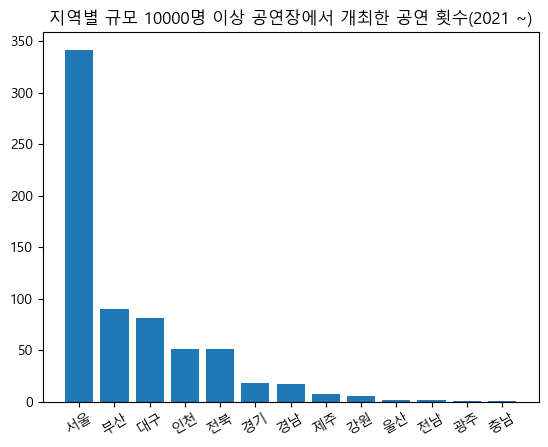

In [130]:
size = 10000
cnt = df_merged[df_merged['총객석수'] >= size]['시(도)'].value_counts()
plt.bar(cnt.index, cnt.values)
plt.xticks(rotation = 30)
plt.title(f'지역별 규모 {size}명 이상 공연장에서 개최한 공연 횟수(2021 ~)')
plt.show()

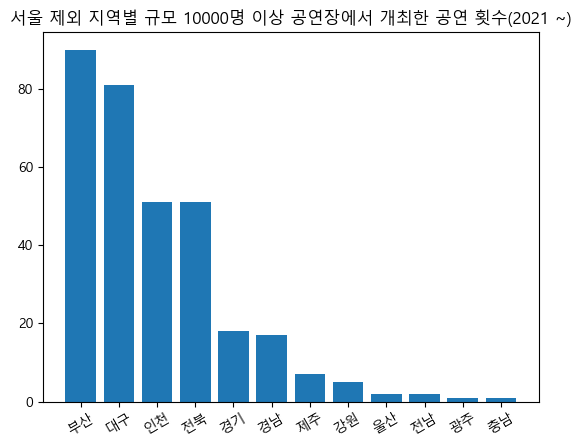

In [131]:
plt.bar(cnt[1:].index, cnt[1:].values)
plt.xticks(rotation = 30)
plt.title(f'서울 제외 지역별 규모 {size}명 이상 공연장에서 개최한 공연 횟수(2021 ~)')
plt.show()